In [3]:
# in this notebook I will develop a vanilla version of FEA using only basic python functions
# Based on PolymerFEM: https://youtu.be/1j_HdsVkglk
# Description: linear finite element analysis for 2D plane strain for linear elastic materials
# Units: mm

import numpy as np
import math
from matplotlib import pyplot as plt

In [90]:
# defining helper ftions

# converting 'natural' coordinates xi, eta into shape functions: (n1, n2, n3, n4)
def shape(xi,eta):
    N1 = (1 - xi) * (1 - eta)
    N2 = (1 + xi) * (1 - eta)
    N3 = (1 + xi) * (1 + eta)
    N4 = (1 - xi) * (1 + eta)
    Ns = np.array([N1, N2, N3, N4])
    return 0.25 * Ns

# 'natural' coordinates xi, eta into gradients of the shape ftions: [(dn1/dx, dn2/dx, ...),
#                                                                    (dn1/de, dn2/de,...)]
def grad_shape(xi, eta):
    dN = np.array([[-1 * (1-eta), 1 * (1-eta), 1 * (1+eta), -1 * (1+eta)],
                   [-1 * (1-xi), -1 * (1+xi), 1 * (1+xi), 1 * (1-xi)]])
    return 0.25 * dN

# plotting mesh - function call:    plot_mesh(nodes, conn, plot_connections=True)
def plot_mesh(nodes, conn, plot_connections=True):
    plt.figure(figsize=(12,12))
    plt.grid(color = 'gray', linewidth=0.2)

    if plot_connections:  # plotting connections
        connections = set()
        for el in conn:
            if len(el) == 4:
                c1, c2, c3, c4 = (el[0], el[1]), (el[1], el[2]), (el[2], el[3]), (el[3], el[0])
                connections.add(c1); connections.add(c2); connections.add(c3); connections.add(c4)
            elif len(el) == 3:
                c1, c2, c3 = (el[0], el[1]), (el[1], el[2]), (el[2], el[0])
                connections.add(c1); connections.add(c2); connections.add(c3)
        for (el1, el2) in connections:
            (x1, y1) = nodes[el1]
            (x2, y2) = nodes[el2]
            plt.plot([x1, x2], [y1, y2], linewidth=0.9, color='orange', marker='', zorder=1)

    plt.scatter(nodes[:,0], nodes[:,1], marker='o', color='b', s=5, zorder=2)  # plot nodes
    plt.axis('equal')
    plt.show()

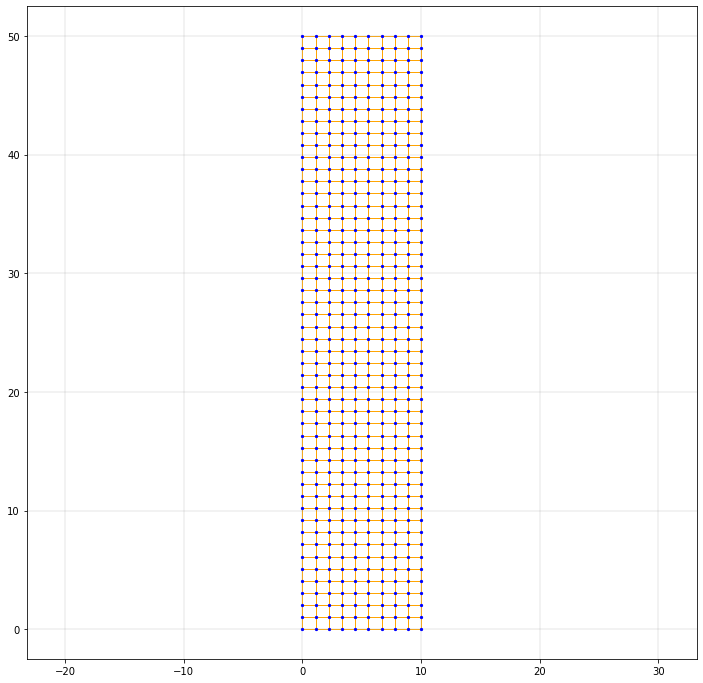

In [94]:
plot_mesh(nodes, conn, plot_connections=True)
#plt.plot([0, 5], [5, 49], linewidth=1, color='red', marker='')

In [65]:
type(nodes[0])
len(nodes[0])

2

In [32]:
# defining a mesh -> list of coordinates for each node
#                 -> list of connections between nodes

# for a rectancgular block of (num_el_x, num_el_y) elements and dimensions (l_x, l_y)
num_el_x, num_el_y = 9, 49   # num of elements
l_x, l_y = 10, 50            # dimensions in x,y
num_nx = num_el_x + 1        # num of nodes in x
num_ny = num_el_y + 1        # num of nodes in y

num_nodes = num_nx * num_ny
num_elements = num_el_x * num_el_y
hx = l_x / num_el_x
hy = l_y / num_el_y

nodes = []  # list of coordinates of all nodes
for y in np.linspace(0., l_y, num_ny):
    for x in np.linspace(0,l_x, num_nx):
        nodes.append([x,y])
nodes = np.array(nodes)

conn = []  # list of connections for each element
for j in range(num_el_y):
    for i in range(num_el_x):
        n0 = i + j * num_nx
        conn.append([n0, n0 + 1, n0 + 1 + num_nx, n0 + num_nx])


499

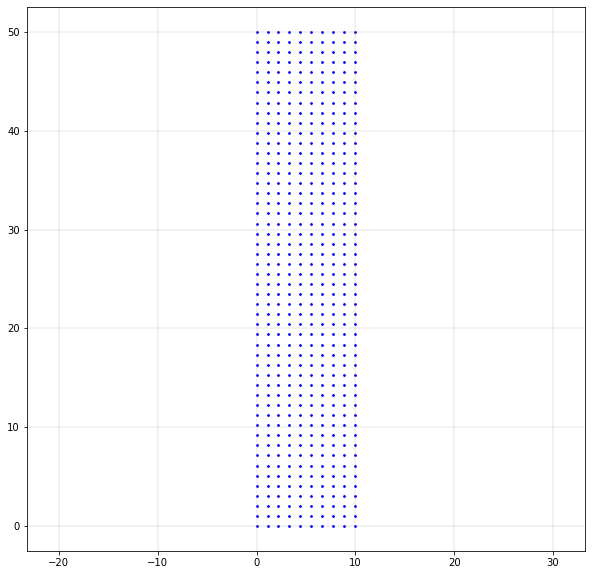